In [1]:
from IPython.core.display import HTML
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# load experimental data
data = pd.read_csv("./src/all_results.csv", sep=';', encoding='utf-8')

[Text(-0.5, 0, 'VGG16'),
 Text(0.5, 0, 'MobileNetV2'),
 Text(1.5, 0, 'EfficientNetB0'),
 Text(2.5, 0, 'DenseNet121')]

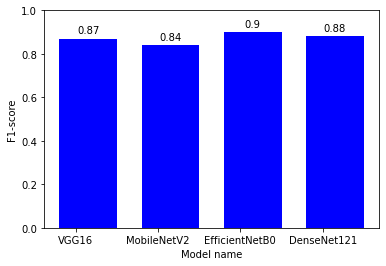

In [2]:
# experiment 1: backbone model choice
# best backbone turns out to be EfficientNetB0 (according to F1-score)

exp1_data = data.iloc[0:4]

fig, ax = plt.subplots()
fig.canvas.draw()
labels = exp1_data["backbone_name"]
x = np.arange(len(labels))
heights = np.round(exp1_data["f1"].to_numpy(), 2)
width = 0.7

bars = ax.bar(x - width/2, heights, width, color='blue')
for p in bars:
    height = p.get_height()
    ax.annotate(f'{height}',
    xy=(p.get_x() + p.get_width() / 2, height),
    xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom')
ax.set_ylim([0, 1])
ax.set_ylabel("F1-score")
ax.set_xlabel("Model name")
ax.set_xticks(np.arange(-0.5, len(labels)-0.5, 1))
ax.set_xticklabels(labels)

[Text(-0.5, 0, '3'), Text(0.5, 0, '5'), Text(1.5, 0, '7')]

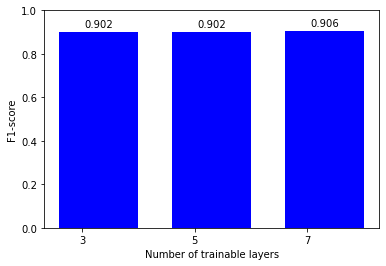

In [4]:
# experiment 2: choosing number of layers
# does not make much difference (it is statistically insignificant)
# but we will use 7 layers anyway

exp2_data = data.iloc[4:7]

fig, ax = plt.subplots()
fig.canvas.draw()
labels = exp2_data["trainable_layers"]
x = np.arange(len(labels))
heights = np.round(exp2_data["f1"].to_numpy(), 3)
width = 0.7

bars = ax.bar(x - width/2, heights, width, color='blue')
for p in bars:
    height = p.get_height()
    ax.annotate(f'{height}',
    xy=(p.get_x() + p.get_width() / 2, height),
    xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom')
ax.set_ylim([0, 1])
ax.set_ylabel("F1-score")
ax.set_xlabel("Number of trainable layers")
ax.set_xticks(np.arange(-0.5, len(labels)-0.5, 1))
ax.set_xticklabels(labels)

[Text(-0.5, 0, 'Adam'), Text(0.5, 0, 'RMSprop'), Text(1.5, 0, 'SGD')]

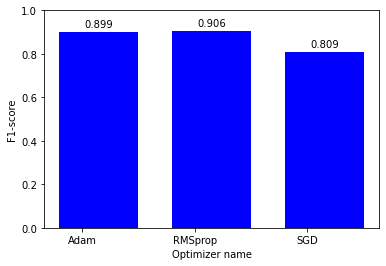

In [5]:
# best optimizer turns out to be RMSprop. That was unexpected!

exp3_data = data.iloc[7:10]

fig, ax = plt.subplots()
fig.canvas.draw()
labels = exp3_data["optim_name"]
x = np.arange(len(labels))
heights = np.round(exp3_data["f1"].to_numpy(), 3)
width = 0.7

bars = ax.bar(x - width/2, heights, width, color='blue')
for p in bars:
    height = p.get_height()
    ax.annotate(f'{height}',
    xy=(p.get_x() + p.get_width() / 2, height),
    xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom')
ax.set_ylim([0, 1])
ax.set_ylabel("F1-score")
ax.set_xlabel("Optimizer name")
ax.set_xticks(np.arange(-0.5, len(labels)-0.5, 1))
ax.set_xticklabels(labels)

[Text(-0.5, 0, '0.0'),
 Text(0.5, 0, '0.9'),
 Text(1.5, 0, '0.99'),
 Text(2.5, 0, '0.999')]

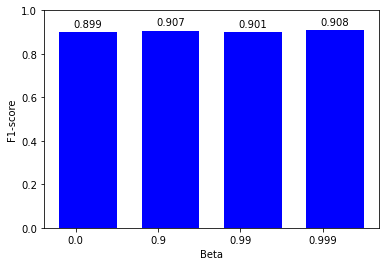

In [7]:
# choosing optimal beta parameter for the class weighting
# the weighting is performed according to the "effective number of samples" formula
exp4_data = data.iloc[10:14]

fig, ax = plt.subplots()
fig.canvas.draw()
labels = exp4_data["beta"]

x = np.arange(len(labels))
heights = np.round(exp4_data["f1"].to_numpy(), 3)
width = 0.7

bars = ax.bar(x - width/2, heights, width, color='blue')
for p in bars:
    height = p.get_height()
    ax.annotate(f'{height}',
    xy=(p.get_x() + p.get_width() / 2, height),
    xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom')
ax.set_ylim([0, 1])
ax.set_ylabel("F1-score")
ax.set_xlabel("Beta")
ax.set_xticks(np.arange(-0.5, len(labels)-0.5, 1))
ax.set_xticklabels(labels)

[Text(-0.5, 0, 'True'), Text(0.5, 0, 'False')]

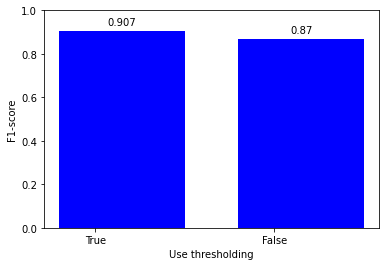

In [8]:
# in this experiment we check if our thresholding preprocessing function is useful
# yes, it is

exp5_data = data.iloc[14:16]

fig, ax = plt.subplots()
fig.canvas.draw()
labels = exp5_data["use_thresholding"].to_numpy().astype(bool)

x = np.arange(len(labels))
heights = np.round(exp5_data["f1"].to_numpy(), 3)
width = 0.7

bars = ax.bar(x - width/2, heights, width, color='blue')
for p in bars:
    height = p.get_height()
    ax.annotate(f'{height}',
    xy=(p.get_x() + p.get_width() / 2, height),
    xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom')
ax.set_ylim([0, 1])
ax.set_ylabel("F1-score")
ax.set_xlabel("Use thresholding")
ax.set_xticks(np.arange(-0.5, len(labels)-0.5, 1))
ax.set_xticklabels(labels)

In [9]:
# all metrics and parameters for the best configuration

# pre -- Precision
# rec -- Recall
# AUC -- AUC score (see scikit-learn AUC)
# f1 -- f1-score

final_pars = data.iloc[14].drop(["Unnamed: 0"])

display(HTML(final_pars.to_frame().to_html()))

,14
rotation_range,20
w_init,imagenet
trainable_layers,7
lr,0.001
bs,128
mean_ovs,10
backbone_name,EfficientNetB0
optim_name,RMSprop
beta,0.999
use_thresholding,1
